### The following code represents a CNN model using Keras to recognize digits,this model reaches an accuracy level of 98.957% on the test set, 100% on the dev set and fits the training set with 100% accuracy. 

In [144]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, Flatten,Conv2D,MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model,Sequential
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [131]:
#Rading input data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [132]:
#Separating out the labels and the images
X_train=train.iloc[:,1:]
y_train=train.iloc[:,:1]
X_test=test

In [133]:
#We normalize the data
X_train=X_train/255.0
X_test=X_test/255.0

In [134]:
#Plotting of any image of desired index
def plotim(a):
    im=np.array(X_train.iloc[int(a)]).reshape((28,28))
    plt.imshow(im)

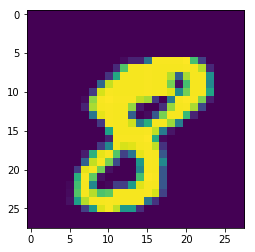

In [135]:
plotim(10)

In [136]:
#Reshape the input to get the form (m,nh,nw,nc)
X_train=X_train.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)

In [137]:
X_train.shape

(42000, 28, 28, 1)

In [138]:
y_train=to_categorical(y_train,num_classes=len(y_train['label'].unique()))

In [139]:
y_train.shape

(42000, 10)

In [140]:
seed=0
xtrain,xdev,ytrain,ydev=train_test_split(X_train,y_train,test_size=0.2,random_state=seed)

In [143]:
xtrain.shape

(33600, 28, 28, 1)

In [275]:
def cnn_model(shape,filters):
    #Number of filters
    F1,F2,F3=filters
    
    model=Sequential()
    model.add(Conv2D(F1,kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer='glorot_uniform',input_shape=shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(F2,kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer='glorot_uniform'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2))) 
    
    model.add(Conv2D(F3,kernel_size=(1,1),strides=(1,1),padding='valid',kernel_initializer='glorot_uniform'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1,1),strides=(1,1))) 

    model.add(Flatten())
    model.add(Dense(1200,input_shape=(540,),activation='relu'))
    model.add(Dense(300,input_shape=(1200,),activation='relu'))
    model.add(Dense(10,input_shape=(300,),activation='softmax'))
    
    return model

In [276]:
cnn=cnn_model(X_train.shape[1:],[5,10,15])

In [277]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [278]:
cnn.fit(X_train,y_train,epochs=50,batch_size=100)

Epoch 1/70
42000/42000 [==============================] - 10s 228us/step - loss: 0.0394 - acc: 0.9864
Epoch 2/70
42000/42000 [==============================] - 8s 195us/step - loss: 0.0132 - acc: 0.9955
Epoch 3/70
42000/42000 [==============================] - 8s 194us/step - loss: 0.0087 - acc: 0.9970
Epoch 4/70
42000/42000 [==============================] - 8s 194us/step - loss: 0.0066 - acc: 0.9977
Epoch 5/70
42000/42000 [==============================] - 8s 193us/step - loss: 0.0052 - acc: 0.9982
Epoch 6/70
42000/42000 [==============================] - 8s 193us/step - loss: 0.0045 - acc: 0.9984
Epoch 7/70
42000/42000 [==============================] - 8s 193us/step - loss: 0.0035 - acc: 0.9989 3s - loss
Epoch 8/70
42000/42000 [==============================] - 8s 196us/step - loss: 0.0027 - acc: 0.9991 1s - loss: 0.
Epoch 9/70
42000/42000 [==============================] - 8s 194us/step - loss: 0.0027 - acc: 0.9991
Epoch 10/70
42000/42000 [==============================] - 8s 195u

In [281]:
#Evaluating on the dev set
cnn.evaluate(xdev,ydev,batch_size=100)

8400/8400 [==============================] - 1s 110us/step


[1.0301624670765769e-07, 1.0]

In [279]:
#Now we predict using the test dataset and then take the max values out of the each 10 number prediction probabilities 
y_pred=cnn.predict(X_test,batch_size=50)
y_classes = [np.argmax(y, axis=None, out=None) for y in y_pred]

In [280]:
#This block converts the predictions into a desired dataframe format and saves it as a CSV file
df=pd.DataFrame(y_classes)
df.rename(columns={0:'Label'},inplace=True)
df=df.reset_index()
df['index']=df['index']+1
df.rename(columns={'index':'ImageId'},inplace=True)
df=df.set_index('ImageId')
df.to_csv('CNN.csv')